<h3> Complete Quantum One-Time Pad </h3>

Now the knowledge needed to develop the protocol. 

<b>$X$</b> gate is good to encrypt in Standard basis.

<b>$Z$</b> gate is good to encrypt in Hadamard basis.

By using a pre-shared classical key, user will apply both gates (X and Z) to his qubit.


$$\ket{E}= X_{k1}Z_{k2}\ket{M}$$

$$X\ket{M} =  \ket{M \oplus 1}$$

$$Z\ket{M} =  (-1)^{M}\ket{M}$$

For decryption,

$$\ket{M} = Z_{k2}X_{k1}\ket{E}=Z_{k2}X_{k1}(X_{k1}Z_{k2}\ket{M})=\ket{M}$$

where $X_{k1}X_{k1}=I$ and $Z_{k2}Z_{k2}=I$.

### Encryption:

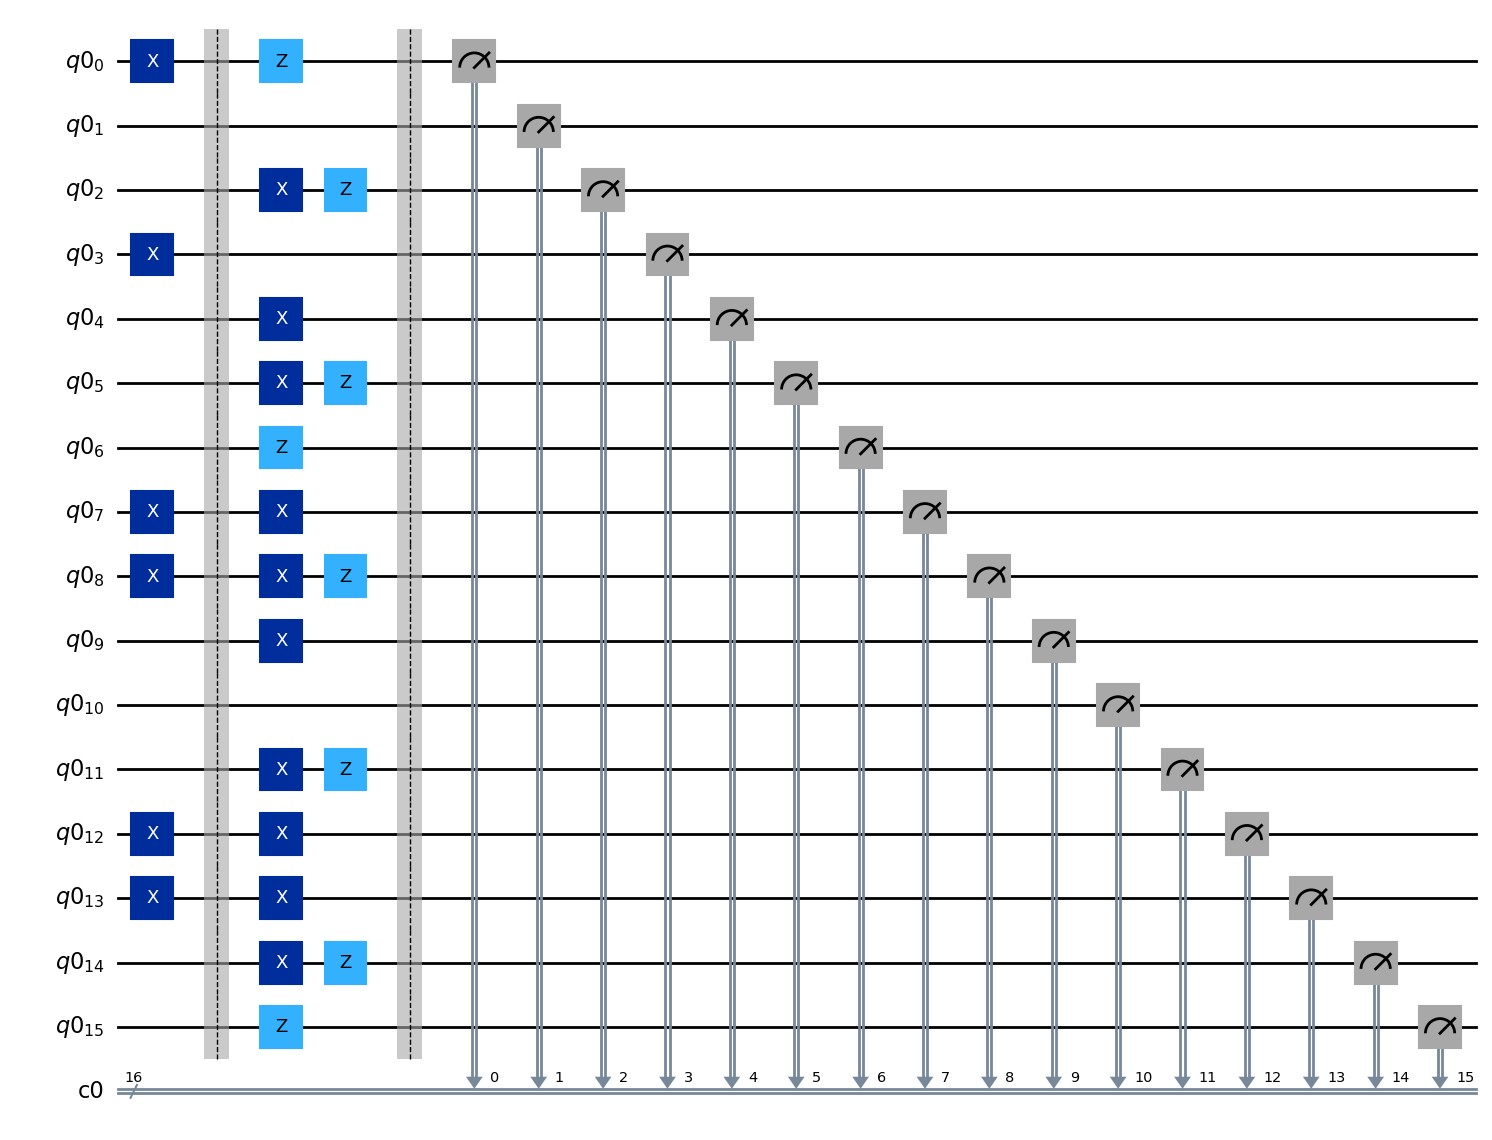

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from random import randrange

# Define the message to be encrypted
message = [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0]
n = len(message)

# Initialize quantum and classical registers
qreg = QuantumRegister(n) 
creg = ClassicalRegister(n) 
mycircuit = QuantumCircuit(qreg, creg) 

# Step 1: Encode the message using X gates
for m in range(n):
    if message[m] == 1:
        mycircuit.x(qreg[m])


mycircuit.barrier()

# Step 2: Generate encryption keys and apply X and Z gates
key_x = []  # Key for X (bit flip)
key_z = []  # Key for Z (phase flip)

for i in range(n):
    # Randomly generate keys for X and Z
    k_x = randrange(2)
    k_z = randrange(2)
    key_x.append(k_x)
    key_z.append(k_z)

    # Apply the gates according to the key
    if k_x == 1:
        mycircuit.x(qreg[i])
    if k_z == 1:
        mycircuit.z(qreg[i])

mycircuit.barrier()

# Step 3: Measure the encrypted message
mycircuit.measure(qreg, creg)
# Draw the circuit
mycircuit.draw(output='mpl')

In [4]:
from qiskit_aer import AerSimulator

job = AerSimulator().run(mycircuit,shots=1)
encryption = job.result().get_counts(mycircuit)

print("Encryption", encryption)
encrypted_message=list(map(int,[*list(encryption.keys())[0]]))

encrypted_message.reverse()
print()
# Print the decryption results
print("Encryption Message:", encrypted_message)
print("key_X:",key_x)
print("key_Z:",key_z)


Encryption {'0100101000111101': 1}

Encryption Message: [1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
key_X: [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]
key_Z: [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]


### Decryption:

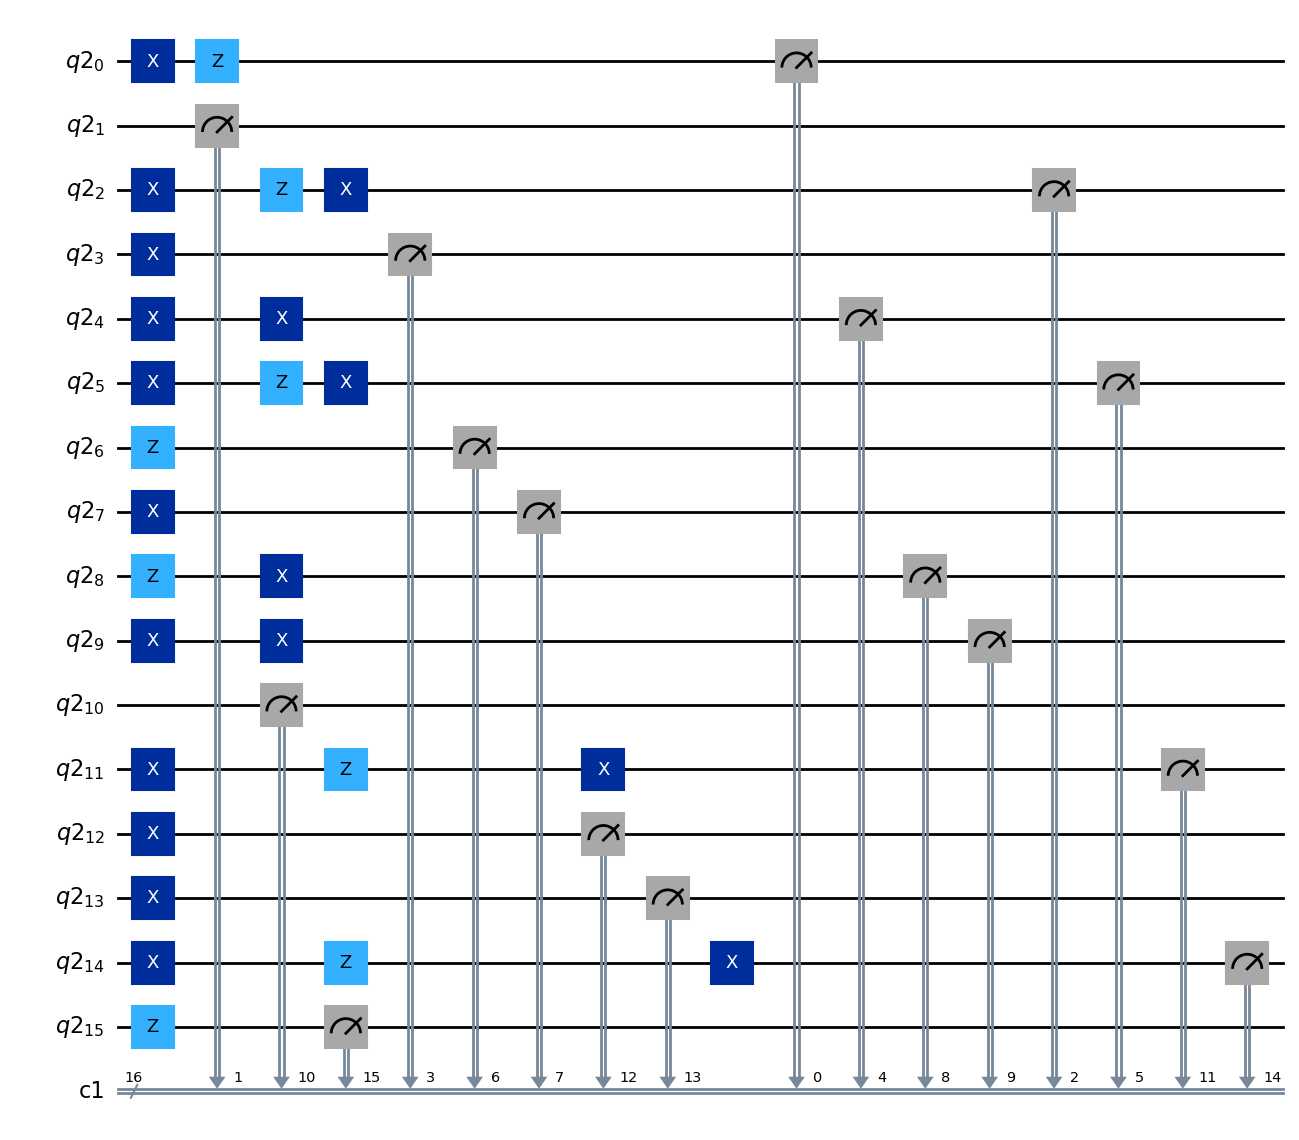

In [6]:
# Step 6: Initialize a new circuit for decryption
qreg_dec = QuantumRegister(n)
creg_dec = ClassicalRegister(n)
decrypt_circuit = QuantumCircuit(qreg_dec, creg_dec)

for m in range(len(encrypted_message)):
    if encrypted_message[m]==1:
        decrypt_circuit.x(qreg_dec[m])

# Step 7: Apply X and Z gates with the same keys for decryption
for i in range(n):
    if key_z[i] == 1:
        decrypt_circuit.z(qreg_dec[i])  # Reverse Z
    if key_x[i] == 1:
        decrypt_circuit.x(qreg_dec[i])  # Reverse X

# Step 8: Measure the decrypted message
decrypt_circuit.measure(qreg_dec, creg_dec)

# Visualize the decryption circuit
decrypt_circuit.draw(output='mpl')

In [7]:
job = AerSimulator().run(decrypt_circuit,shots=1)
decryption = job.result().get_counts(decrypt_circuit)

print("Decryption", decryption)
decrypted_message=list(map(int,[*list(decryption.keys())[0]]))

decrypted_message.reverse()
print()
# Print the decryption results
print("Decrypted Message:", decrypted_message)
print()

if message == decrypted_message:  
    print("Protocol is correct!")  
else:  
    print("Protocol is incorrect!")

Decryption {'0011000110001001': 1}

Decrypted Message: [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0]

Protocol is correct!
